**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [2]:
# Load dataset (ensure the file is in your directory)
df = pd.read_csv("/content/synthetic_sales_data.csv", parse_dates=['Purchase_Date'])
df.head()


,CustomerID,Age,Gender,Annual_Income,Spending_Score,Region,Purchase_Amount,Purchase_Date
0,1001,56.0,Female,24449.26,2,East,336.65,2023-01-01
1,1002,69.0,Male,49166.78,47,East,274.30,2023-01-02
2,1003,46.0,Male,55760.98,78,West,401.09,2023-01-03
3,1004,32.0,Female,49509.58,84,South,286.95,2023-01-04
4,1005,60.0,Male,18988.37,22,East,239.57,2023-01-05


**Basic Info and Missing Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       500 non-null    int64         
 1   Age              475 non-null    float64       
 2   Gender           500 non-null    object        
 3   Annual_Income    475 non-null    float64       
 4   Spending_Score   500 non-null    int64         
 5   Region           500 non-null    object        
 6   Purchase_Amount  475 non-null    float64       
 7   Purchase_Date    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 31.4+ KB


In [4]:
df.describe(include='all')

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Region,Purchase_Amount,Purchase_Date
count,500.000000,475.000000,500,475.000000,500.000000,500,475.000000,500
unique,NaN,NaN,2,NaN,NaN,4,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,South,NaN,NaN
freq,NaN,NaN,262,NaN,NaN,135,NaN,NaN
mean,1250.500000,44.077895,NaN,49804.267137,49.274000,NaN,299.115916,2023-09-07 12:00:00
min,1001.000000,18.000000,NaN,9546.700000,1.000000,NaN,-35.160000,2023-01-01 00:00:00
25%,1125.750000,32.000000,NaN,40367.655000,24.000000,NaN,239.680000,2023-05-05 18:00:00
50%,1250.500000,44.000000,NaN,49479.730000,48.000000,NaN,299.090000,2023-09-07 12:00:00
75%,1375.250000,57.000000,NaN,59318.615000,75.000000,NaN,361.810000,2024-01-10 06:00:00
max,1500.000000,69.000000,NaN,96183.210000,99.000000,NaN,554.680000,2024-05-14 00:00:00


In [5]:
df.isnull().sum()

,0
CustomerID,0
Age,25
Gender,0
Annual_Income,25
Spending_Score,0
Region,0
Purchase_Amount,25
Purchase_Date,0


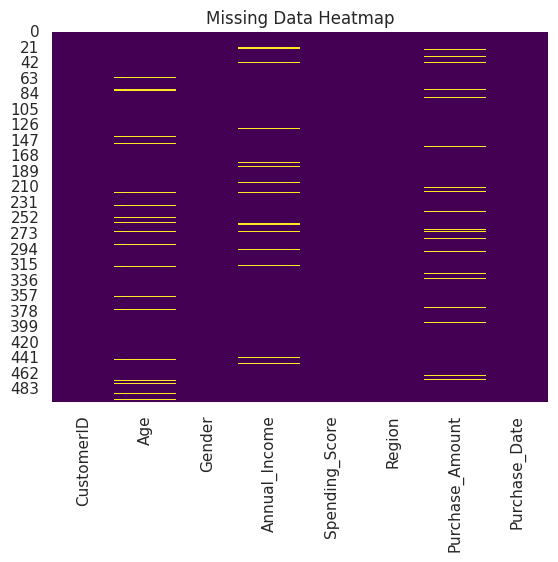

In [6]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**Handle Missing Data**

In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].mean(), inplace=True)
df['Purchase_Amount'].fillna(df['Purchase_Amount'].mean(), inplace=True)


**Feature Types**

In [8]:
numerical = df.select_dtypes(include=['int64', 'float64'])
categorical = df.select_dtypes(include=['object'])

numerical.columns, categorical.columns


(Index(['CustomerID', 'Age', 'Annual_Income', 'Spending_Score',
        'Purchase_Amount'],
       dtype='object'),
 Index(['Gender', 'Region'], dtype='object'))

**Histograms and Value Counts**

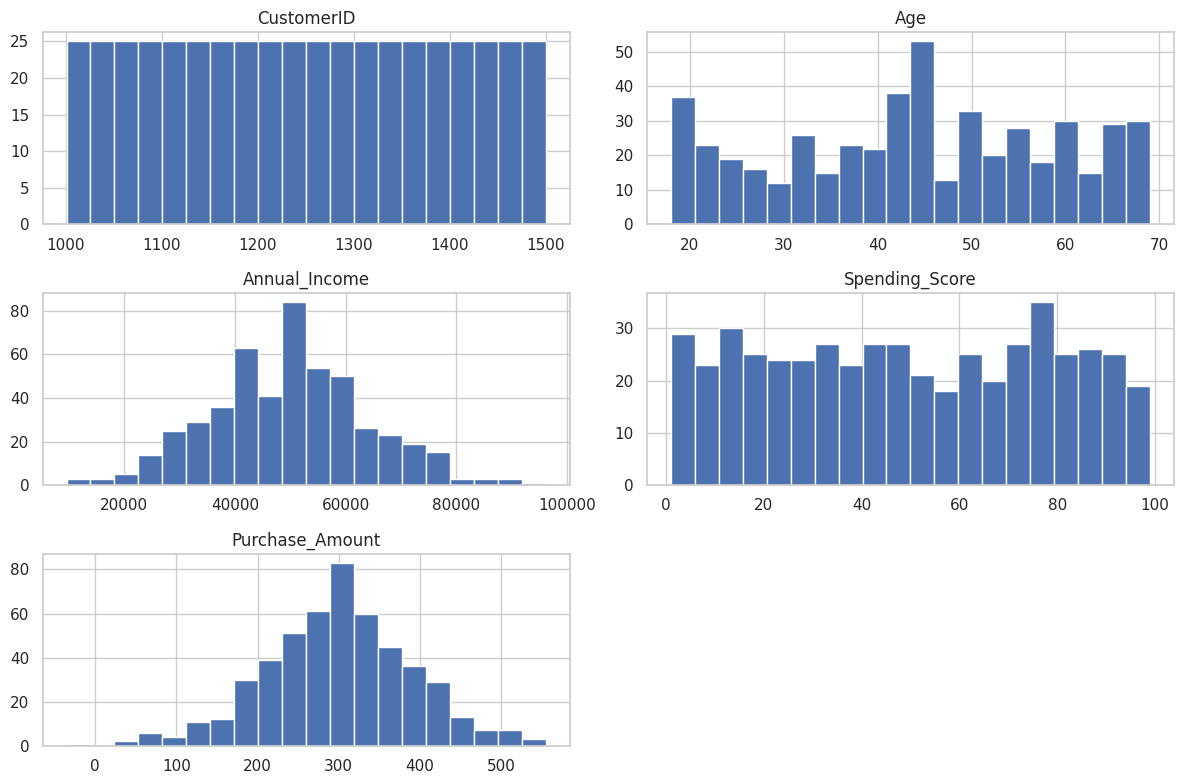

In [9]:
numerical.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


In [10]:
for col in categorical.columns:
    print(f"\n{col} value counts:\n", df[col].value_counts())



Gender value counts:
 Gender
Male      262
Female    238
Name: count, dtype: int64

Region value counts:
 Region
South    135
West     129
North    129
East     107
Name: count, dtype: int64


**Bar Plot**

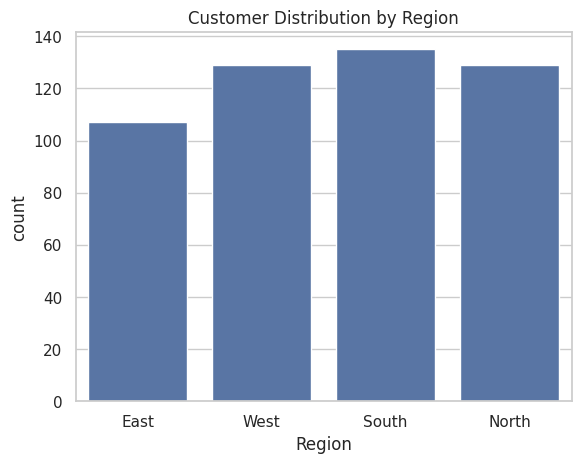

In [11]:
sns.countplot(x='Region', data=df)
plt.title("Customer Distribution by Region")
plt.show()


 **Line Plot**

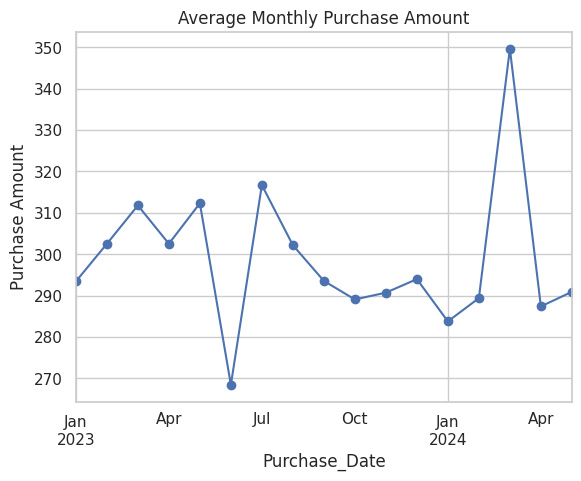

In [12]:
df.set_index("Purchase_Date").resample("M")['Purchase_Amount'].mean().plot(marker='o')
plt.title("Average Monthly Purchase Amount")
plt.ylabel("Purchase Amount")
plt.show()


**Correlation Heatmap**

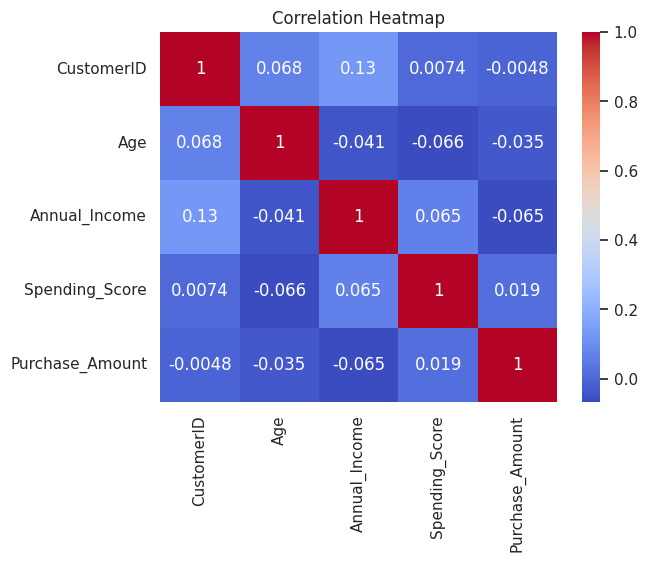

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Boxplot for Outliers**

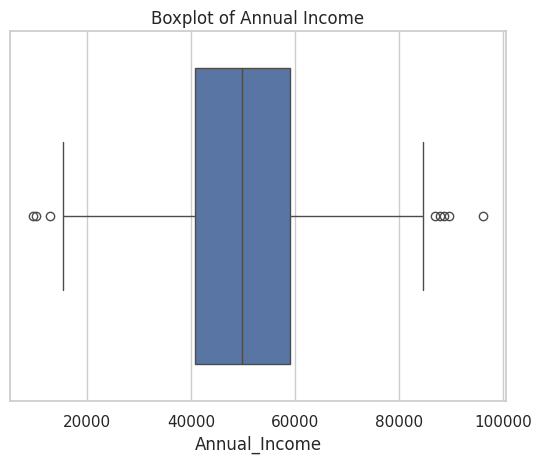

In [14]:
sns.boxplot(x=df['Annual_Income'])
plt.title("Boxplot of Annual Income")
plt.show()


**Scatter Plot**

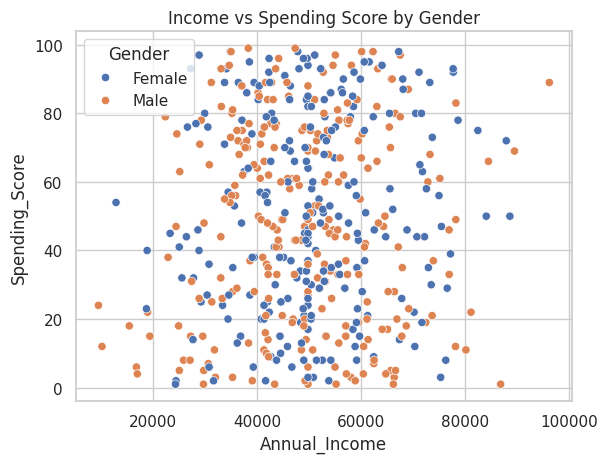

In [15]:
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Gender', data=df)
plt.title("Income vs Spending Score by Gender")
plt.show()


**Pairplot**

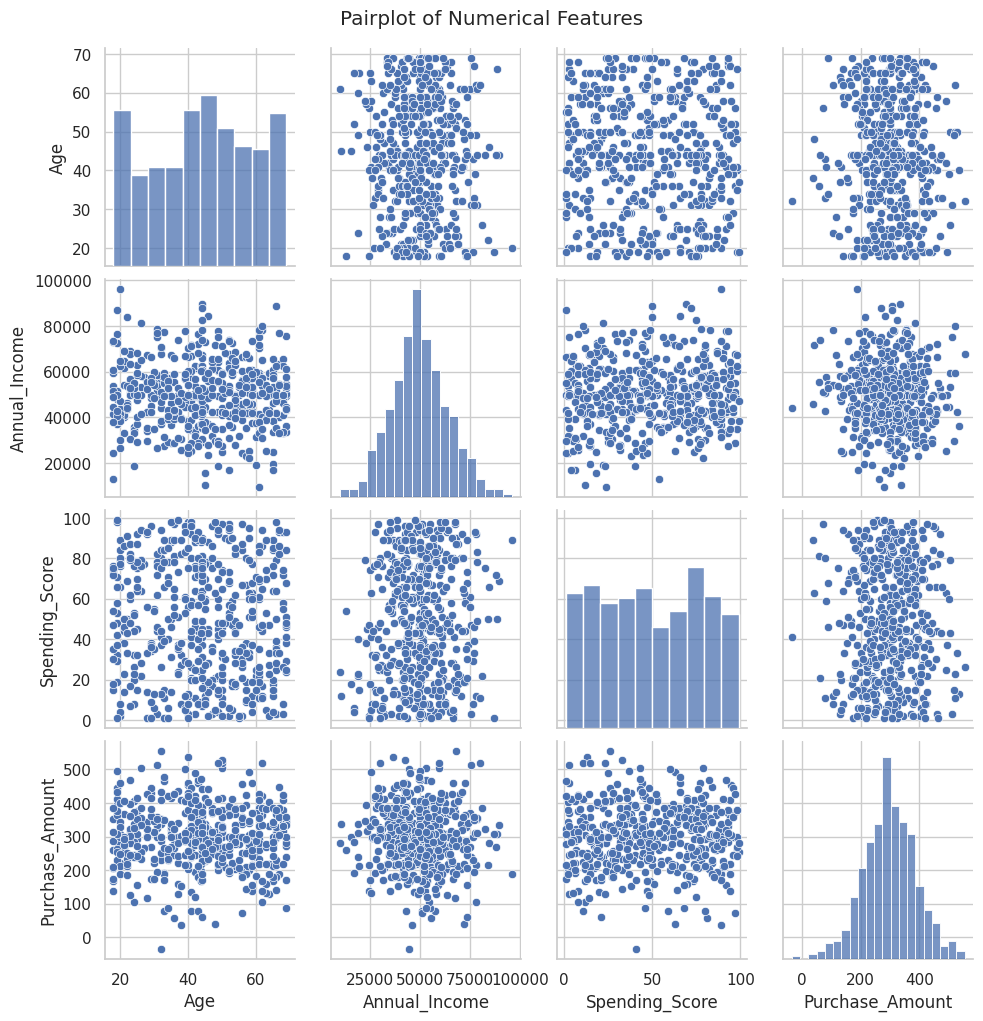

In [16]:
sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score', 'Purchase_Amount']])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()
